# ***Green roof provider location-allocation in Helsinki***

## ***Problem***

The new Green Roofs provider `Bryan's Eco Roof Oy` is looking a new market at Helsinki for selling green roofs. The manager has some conditions which need to be answered to define the new location-allocation of the new Roof Market. The conditions are next:
- The new `Bryan's Eco Roof Oy` seller must be located in a Shopping Mall Center in Helsinki.
- The preferible travel mode to reach must be car.
- The location-allocation must be in the area with more green roof's potential area/population so can get more clients.

## ***Solution***

In this assingment I am going to provide a Static Map to solve the issue of the `Bryan's Eco Roof Oy`. The steps of this assignment goes as follow:
- Create the Dominant Areas for Shopping Mall Centers by Car.
- Calculate the indicator of Green Roof's potential area/population per Dominant Area. (m2/person)
- Create a Choropleth map which can be used by `Bryan's Eco Roof Oy` for location-allocation.

### ***1. Reading data***

The pop layer crs is: None


,pop18,geometry
0,108,MULTIPOLYGON Z (((25476499.999 6674248.999 0.0...
1,273,MULTIPOLYGON Z (((25476749.997 6674498.998 0.0...
2,239,MULTIPOLYGON Z (((25476999.994 6675749.004 0.0...
3,202,MULTIPOLYGON Z (((25476999.994 6675499.004 0.0...
4,261,MULTIPOLYGON Z (((25476999.994 6675249.005 0.0...


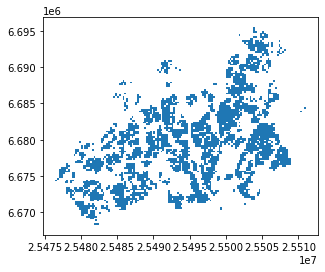

In [116]:
import geopandas as gpd
from pyproj import CRS
import requests
import geojson

# POPULATION LAYER

# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

# Change the name of a column
pop = pop.rename(columns={'asukkaita': 'pop18'})

# Subset columns
pop = pop[["pop18", "geometry"]]

print('The pop layer crs is: {}'.format(pop.crs))
pop.plot()
pop.head()

The grid layer crs is: ETRS89 / TM35FIN(E,N)


,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


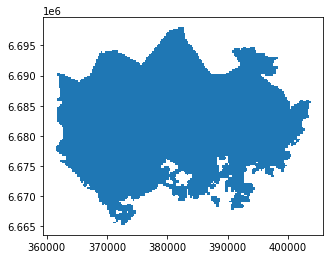

In [117]:
import glob
import pandas as pd

#GRID FOR TRAVEL TIMES

# reading grid
grid_path = r'data\MetropAccess_YKR_grid_EurefFIN.shp'
grid = gpd.read_file(grid_path)

print('The grid layer crs is: {}'.format(grid.crs.name))
grid.plot();
grid.head()

In [118]:
# TRAVEL TIMES TO SHOPPING CENTERS

# reading files
filepaths = glob.glob(r"data/TravelTimes*.txt")

filepaths

['data\\TravelTimes_to_5878070_Jumbo.txt',
 'data\\TravelTimes_to_5878087_Dixi.txt',
 'data\\TravelTimes_to_5902043_Myyrmanni.txt',
 'data\\TravelTimes_to_5944003_Itis.txt',
 'data\\TravelTimes_to_5975373_Forum.txt',
 'data\\TravelTimes_to_5978593_IsoOmena.txt',
 'data\\TravelTimes_to_5980260_Ruoholahti.txt']

In [119]:
# POTENTIAL GREEN ROOFS

# reading file
gfp = r'data/green_roof_potential.shp'

green = gpd.read_file(gfp)

green.head()

,kunta,ala,vaikutus,geometry
0,Kauniainen,49.680,14.024,"POLYGON ((25483949.210 6677342.637, 25483948.7..."
1,Kauniainen,10.591,33.688,"POLYGON ((25485392.414 6678569.299, 25485393.8..."
2,Kauniainen,6.995,28.408,"POLYGON ((25483947.615 6678532.558, 25483947.9..."
3,Kauniainen,24.302,41.534,"POLYGON ((25485306.192 6677592.278, 25485312.4..."
4,Kauniainen,1170.800,37.607,"POLYGON ((25485303.274 6677554.338, 25485299.2..."


In [120]:
from shapely.geometry import Polygon

# calculating area of each potential roofs

# checking crs
print(green.crs.name)

# Calculating area
green['area_roof'] = [roof.area for roof in green['geometry']]

green.head()

ETRS89_ETRS_GK25FIN_2010


,kunta,ala,vaikutus,geometry,area_roof
0,Kauniainen,49.680,14.024,"POLYGON ((25483949.210 6677342.637, 25483948.7...",8.542745
1,Kauniainen,10.591,33.688,"POLYGON ((25485392.414 6678569.299, 25485393.8...",10.591205
2,Kauniainen,6.995,28.408,"POLYGON ((25483947.615 6678532.558, 25483947.9...",6.995378
3,Kauniainen,24.302,41.534,"POLYGON ((25485306.192 6677592.278, 25485312.4...",24.301906
4,Kauniainen,1170.800,37.607,"POLYGON ((25485303.274 6677554.338, 25485299.2...",1170.800416


### ***2. Joining data for Car Travel Time***

In [121]:
# reading files
name_columns = ['car_r_t_Jumbo', 'car_r_t_Dixi', 'car_r_t_Myyrmanni', 'car_r_t_Itis', 'car_r_t_Forum', 'car_r_t_IsoOmena', 'car_r_t_Ruoholahti']

# iterates over files and name colums, to join in grid
for file, namecol in zip(filepaths, name_columns):
    
    # reads files and rename colums to join easily
    data = pd.read_csv(file, sep=';', usecols=['from_id', 'car_r_t']).rename(columns={'car_r_t':namecol, 'from_id': 'YKR_ID'})
    
    # join car travel times
    grid = grid.merge(data, on = 'YKR_ID')
    
grid.head()

,x,y,YKR_ID,geometry,car_r_t_Jumbo,car_r_t_Dixi,car_r_t_Myyrmanni,car_r_t_Itis,car_r_t_Forum,car_r_t_IsoOmena,car_r_t_Ruoholahti
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",39,45,39,50,49,56,56
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",39,45,39,51,49,56,56
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",45,52,47,58,57,64,63
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",46,48,51,57,60,67,67
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",38,44,38,50,48,55,55


In [122]:
import numpy as np

# removing no data
print('all data has {} records'.format(len(grid)))

grid = grid.replace(-1, np.nan).dropna()

print('removed null has {} records'.format(len(grid)))

all data has 13231 records
removed null has 13140 records


### ***3. Creating Dominant Areas***

,x,y,YKR_ID,geometry,car_r_t_Jumbo,car_r_t_Dixi,car_r_t_Myyrmanni,car_r_t_Itis,car_r_t_Forum,car_r_t_IsoOmena,car_r_t_Ruoholahti,min_t,dominant_service,avg
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",39.0,45.0,39.0,50.0,49.0,56.0,56.0,39.0,Jumbo,47.714286
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",39.0,45.0,39.0,51.0,49.0,56.0,56.0,39.0,Jumbo,47.857143
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",45.0,52.0,47.0,58.0,57.0,64.0,63.0,45.0,Jumbo,55.142857
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",46.0,48.0,51.0,57.0,60.0,67.0,67.0,46.0,Jumbo,56.571429
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",38.0,44.0,38.0,50.0,48.0,55.0,55.0,38.0,Jumbo,46.857143


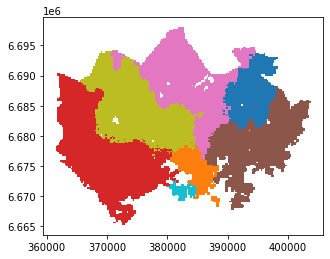

In [123]:
# Define value columns
value_columns = ['car_r_t_Jumbo', 'car_r_t_Dixi', 'car_r_t_Myyrmanni', 'car_r_t_Itis', 'car_r_t_Forum', 'car_r_t_IsoOmena', 'car_r_t_Ruoholahti']

# Create a new column for minimum travel time values 
grid['min_t'] = grid[value_columns].min(axis = 1)

# Create a new column for the closest shopping center id values
grid['dominant_service'] = (grid[value_columns].idxmin(axis = 1))

# Adding average
grid['avg'] = (grid[value_columns].mean(axis = 1))

# Include the name of the shopping mall
grid['dominant_service'] = [mall.split('_')[-1] for mall in grid['dominant_service']]

grid.plot(column = 'dominant_service');
grid.to_file(r'results/grid_area_avg.shp')
grid.head()


### ***4. Adding population info and Potential Green Roof area to Dominant Areas***

In [124]:
# DEFINING CRS
# definying the crs.  ETRS GK-25 (EPSG:3879) because we know what it is based on the population grid metadata.
pop.crs = CRS.from_epsg(3879)

# projecting
pop = pop.to_crs(epsg=grid.crs.to_epsg())

green = green.to_crs(epsg=grid.crs.to_epsg())

pop.crs.name
green.crs.name

'ETRS89 / TM35FIN(E,N)'

In [125]:
# aggregating dominance areas
grid = grid.dissolve(by = 'dominant_service')[['geometry']]
grid.head()

,geometry
dominant_service,
Dixi,"MULTIPOLYGON (((392250.000 6681000.000, 392000..."
Forum,"MULTIPOLYGON (((385000.000 6669500.000, 384750..."
IsoOmena,"MULTIPOLYGON (((373000.000 6665250.000, 372750..."
Itis,"MULTIPOLYGON (((391000.000 6667750.000, 390750..."
Jumbo,"MULTIPOLYGON (((385750.000 6676000.000, 385500..."


,pop18,geometry,index_right
0,108,MULTIPOLYGON Z (((365582.138 6673970.899 0.000...,IsoOmena
1,273,MULTIPOLYGON Z (((365839.544 6674213.167 0.000...,IsoOmena
2,239,MULTIPOLYGON Z (((366127.234 6675454.796 0.000...,IsoOmena
3,202,MULTIPOLYGON Z (((366119.663 6675204.958 0.000...,IsoOmena
4,261,MULTIPOLYGON Z (((366112.092 6674955.121 0.000...,IsoOmena


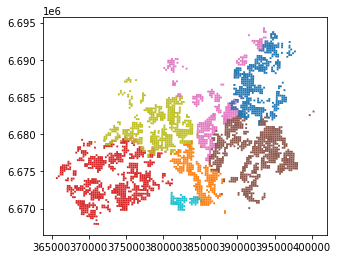

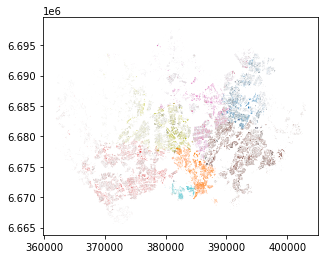

In [126]:
# intersect spatial join with population layer
join = gpd.sjoin(pop, grid, how = 'inner', op = 'intersects')

# intersect spatial join with green roof layer
join_green = gpd.sjoin(green, grid, how = 'inner', op = 'intersects')

join.plot(column = 'index_right')
join_green.plot(column = 'index_right')
join.head()

In [127]:
# population by dominant area

pop_area = pd.DataFrame()

for key, group in join.groupby('index_right'):
    '''Iterating over groups by dominance area to sum population'''
    
    pop_area.loc[key, 'dominance_area'] = key
    
    pop_area.loc[key, 'pop_sum'] = group['pop18'].sum()
    
# printing info
for area, pop in zip(pop_area['dominance_area'], pop_area['pop_sum']):
    print('{} dominance area has {} inhabitants'.format(area, pop))

# joining population by dominance area
grid = grid.merge(pop_area, left_on=grid.index, right_on=pop_area.index )

grid.head()

Dixi dominance area has 122535.0 inhabitants
Forum dominance area has 202552.0 inhabitants
IsoOmena dominance area has 205378.0 inhabitants
Itis dominance area has 264549.0 inhabitants
Jumbo dominance area has 97765.0 inhabitants
Myyrmanni dominance area has 160802.0 inhabitants
Ruoholahti dominance area has 38960.0 inhabitants


,key_0,geometry,dominance_area,pop_sum
0,Dixi,"MULTIPOLYGON (((392250.000 6681000.000, 392000...",Dixi,122535.0
1,Forum,"MULTIPOLYGON (((385000.000 6669500.000, 384750...",Forum,202552.0
2,IsoOmena,"MULTIPOLYGON (((373000.000 6665250.000, 372750...",IsoOmena,205378.0
3,Itis,"MULTIPOLYGON (((391000.000 6667750.000, 390750...",Itis,264549.0
4,Jumbo,"MULTIPOLYGON (((385750.000 6676000.000, 385500...",Jumbo,97765.0


In [128]:
# green roof potential area by dominant area

green_area = pd.DataFrame()

for key, group in join_green.groupby('index_right'):
    '''Iterating over groups by dominance area to sum potential green roof area'''
    
    green_area.loc[key, 'dominance_area'] = key
    
    green_area.loc[key, 'roof_sum'] = group['area_roof'].sum()
    
# printing info
for area, roof in zip(green_area['dominance_area'], green_area['roof_sum']):
    print('{} dominance area has {} potential green roof area m2'.format(area, pop))

# joining roof area by dominance area
grid = grid.merge(green_area, left_on='dominance_area', right_on=green_area.index )

grid.head()

Dixi dominance area has 38960.0 potential green roof area m2
Forum dominance area has 38960.0 potential green roof area m2
IsoOmena dominance area has 38960.0 potential green roof area m2
Itis dominance area has 38960.0 potential green roof area m2
Jumbo dominance area has 38960.0 potential green roof area m2
Myyrmanni dominance area has 38960.0 potential green roof area m2
Ruoholahti dominance area has 38960.0 potential green roof area m2


,dominance_area,key_0,geometry,dominance_area_x,pop_sum,dominance_area_y,roof_sum
0,Dixi,Dixi,"MULTIPOLYGON (((392250.000 6681000.000, 392000...",Dixi,122535.0,Dixi,4.175262e+06
1,Forum,Forum,"MULTIPOLYGON (((385000.000 6669500.000, 384750...",Forum,202552.0,Forum,7.529108e+06
2,IsoOmena,IsoOmena,"MULTIPOLYGON (((373000.000 6665250.000, 372750...",IsoOmena,205378.0,IsoOmena,7.293015e+06
3,Itis,Itis,"MULTIPOLYGON (((391000.000 6667750.000, 390750...",Itis,264549.0,Itis,1.195941e+07
4,Jumbo,Jumbo,"MULTIPOLYGON (((385750.000 6676000.000, 385500...",Jumbo,97765.0,Jumbo,5.896240e+06


### ***5. Calculating  Potential area/person by Dominant Area***

In [129]:
# creating a copy
grid_all = grid.copy()

# Getting only the needed columns
grid_all = grid_all[['dominance_area', 'geometry', 'pop_sum', 'roof_sum']]

In [136]:
# calculating indicator
grid_all['roof_person_m2'] = [round(roof/person, 2) for roof, person in zip(grid['roof_sum'], grid['pop_sum'])]

grid_all.to_file(r'results/grid_roof_person.shp')
grid_all.head()


,dominance_,key_0,dominanc_1,pop_sum,dominanc_2,roof_sum,geometry,roof_person_m2
0,Dixi,Dixi,Dixi,122535.0,Dixi,4.175262e+06,"MULTIPOLYGON (((2788914.549 8455925.129, 27884...",34.07
1,Forum,Forum,Forum,202552.0,Forum,7.529108e+06,"MULTIPOLYGON (((2775069.108 8432367.280, 27745...",37.17
2,IsoOmena,IsoOmena,IsoOmena,205378.0,IsoOmena,7.293015e+06,"MULTIPOLYGON (((2751326.735 8423051.462, 27508...",35.51
3,Itis,Itis,Itis,264549.0,Itis,1.195941e+07,"MULTIPOLYGON (((2787193.878 8429223.854, 27866...",45.21
4,Jumbo,Jumbo,Jumbo,97765.0,Jumbo,5.896240e+06,"MULTIPOLYGON (((2776165.005 8445469.325, 27756...",60.31


### ***6. Formating Map***

In [137]:
import matplotlib.pyplot as plt
import contextily as ctx
import mapclassify

In [166]:
# reading map files in Mercator 3857
sfp = r'data/sea.shp'
sea = gpd.read_file(sfp)

stfp = r'data/roads.shp'
streets = gpd.read_file(stfp)
streets = streets.to_crs(3857)

shfp = r'data/shopping_centers.shp'
malls = gpd.read_file(shfp)
malls = malls.to_crs(3857)


mfp = r'data/metro.shp'
metro = gpd.read_file(mfp)

rfp = r'data/railway.shp'
railway = gpd.read_file(rfp)

grid_fp = r'results/grid_roof_person.shp'
grid_all = gpd.read_file(grid_fp)

print(sea.crs == streets.crs == metro.crs == railway.crs)
sea.crs.name

True


'WGS 84 / Pseudo-Mercator'

In [167]:
# grid to mercator
grid_all = grid_all.to_crs(3857)

grid_avg = grid_avg.to_crs(3857)
grid_all.crs.name

'WGS 84 / Pseudo-Mercator'

In [168]:
grid_all.head()

,dominance_,key_0,dominanc_1,pop_sum,dominanc_2,roof_sum,roof_perso,geometry
0,Dixi,Dixi,Dixi,122535.0,Dixi,4.175262e+06,34.07,"MULTIPOLYGON (((2788914.549 8455925.129, 27884..."
1,Forum,Forum,Forum,202552.0,Forum,7.529108e+06,37.17,"MULTIPOLYGON (((2775069.108 8432367.280, 27745..."
2,IsoOmena,IsoOmena,IsoOmena,205378.0,IsoOmena,7.293015e+06,35.51,"MULTIPOLYGON (((2751326.735 8423051.462, 27508..."
3,Itis,Itis,Itis,264549.0,Itis,1.195941e+07,45.21,"MULTIPOLYGON (((2787193.878 8429223.854, 27866..."
4,Jumbo,Jumbo,Jumbo,97765.0,Jumbo,5.896240e+06,60.31,"MULTIPOLYGON (((2776165.005 8445469.325, 27756..."


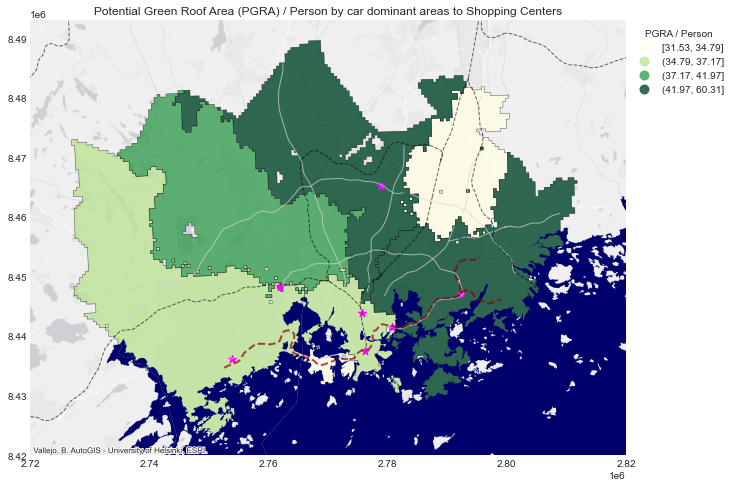

In [209]:
plt.style.use('seaborn-dark')

# create base ax
fig, ax = plt.subplots(figsize = [12,8])


grid_all.plot(ax=ax, column = 'roof_perso',scheme = 'Quantiles', k = 4, cmap = 'YlGn',alpha = 0.8, edgecolor = 'black', linewidth = 0.4,legend = True)
sea.plot(ax=ax, facecolor = '#00006c',  legend=True)
streets.plot(ax=ax, linewidth = 1, color = 'lightgray', alpha=0.7, legend=True)
railway.plot(ax=ax, linestyle = 'dashed',linewidth = 1, color = 'black', alpha=0.6, legend=True)
metro.plot(ax=ax, linestyle = 'dashed', linewidth = 2, color = 'darkred', alpha=0.7, legend=True)
malls.plot(ax=ax, color = 'magenta', marker = '*', markersize = 70, legend=True)


ax.set_xlim(2720000, 2820000)
ax.set_ylim(8420000, 8493000)

ax.title.set_text('Potential Green Roof Area (PGRA) / Person by car dominant areas to Shopping Centers')

ax.get_legend().set_title('PGRA / Person')
ax.get_legend().set_bbox_to_anchor((1.18, 1))

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldGrayCanvas, 
                attribution='Vallejo, B. AutoGIS - University of Helsinki, ESRI.')

plt.savefig('docs/pgra_car_malls.png', dpi=300)

## ***Conclusion***

The better Shopping Center to sell Green Roof Areas are Itis Shopping Center and Jumbo Shopping Center because they have higher potential for sell (dark green color)